# DESAFIO MODELO DE AGRUPAMENTO

### Objetivo:

Criar um modelo de agrupamento a partir da base de dados pública Daily and Sports Activities, que pode ser encontrada nesta URL: https://archive.ics.uci.edu/ml/datasets/Daily+and+Sports+Activities 

### Necessidade:

O modelo de cluster em Python foi desenvolvido de acordo com o raciocínio abaixo:

•	O dataset deve ser o Daily and Sport Activities;<br/>
•	Escolher e informar dois esportes (um mais calmo e outro mais agitado);<br/>
•	Analisar os eixos X, Y e Z do sensor Acelerômetro apenas do Dorso;<br/>
•	Explicar o porque escolheu o algoritmo de cluster usado (e porque não usou outros);<br/>
•	Receber as entradas específicas (escolher as variáveis pertinentes);<br/>
•	Justificar a escolha das variáveis;<br/>
•	Apresentar os clusters de forma gráfica;<br/>
•	Justificar a performance do modelo de cluster, com base nos métodos de avaliação pertinentes.




In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from matplotlib import pylab
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
% matplotlib inline

In [3]:
def generate_feature_names():
    """
    Criar lista com nomes das colunas
    Args: Nenhum
    Return: lista com nomes das colunas
    """
    feat_names = []
    for unit_label in ["T", "RA", "LA", "RL", "LL"]:
        for sensor  in ["acc","gyro","mag"]:
            for position in ['X','Y','Z']:
                feat_names.append(unit_label + "_" + position + sensor)
    return feat_names

In [4]:
def load_segment_names(path_home, path_data):
    """
    Carregar lista de um subconjunto de arquivos
    Args: 
        path_home = caminho da pasta principal
        path_data = caminho do subconjunto
    Return: lista com nome dos arquivos
    """
    return [filename for filename in os.listdir(path_home + path_data)]

In [5]:
def load_data(atividade):
    """
    Carregar dados de todos os usuários de uma atividade específica
    Args: atividade = Código da atividade igual ao nome da pasta
    Return: Dataframe com todos os dados da atividade
    """
    data_home = "C:\\Users\\felipe.simione\\Desktop\\DESAFIO_CLUSTER\\data\\"
    df_total = pd.DataFrame(columns=feat_names)
    for x in range(8):
        user_data = "{0}\\p{1}\\".format(atividade, x+1)
        for i in range(60):
            # Carregamento de todos os dados da atividade especificada
            file_names = load_segment_names(data_home, user_data)
            walk_file = data_home + user_data + file_names[i]
            df = pd.read_csv(walk_file, names = feat_names)
            df_total = df_total.append(df)
    return df_total

In [6]:
# Gerando lista com nomes das colunas
feat_names = generate_feature_names()

# Identificando a densidade das atividades
Podemos intuitivamente definir que a atividade a09 é mais leve que a atividade a14, porém para que possamos afirmar e continuar a análise faremos uma pré-análise simples. 

Obs: Outras combinações de atividades foram analisadas.

In [31]:
# Obtendo os dados das duas atividades
df_a09 = load_data("a09")
df_a09_pernas = df_a09.iloc[:,27:45]
df_a09_pernas_A = df_a09_pernas.iloc[:,:2]

df_a15 = load_data("a15")
df_a15_pernas = df_a15.iloc[:,27:45]
df_a15_pernas_A = df_a15_pernas.iloc[:,:2]

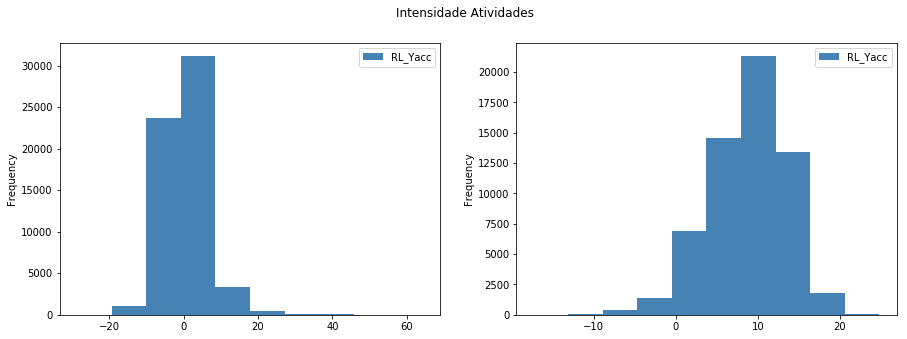

In [32]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
df_a09_pernas_A.plot(kind='hist', x='RL_Xacc', y='RL_Yacc', color='steelblue', title='Intensidade Atividades'
                     , ax = axes[0], subplots=True)
df_a15_pernas_A.plot(kind='hist', x='RL_Xacc', y='RL_Yacc', color='steelblue', title='Intensidade Atividades'
                     , ax = axes[1], subplots=True)
plt.show()

No gráfico acima podemos comprovar que a atividade a09 é mais leve do que a atividade a15, portanto vamos continuar o modelo entre essas duas atividades.

# Primeira Atividade A9

Iniciaremos com a analise da atividade "walking in a parking lot (A9)", sendo considerada uma atividade mais leve. Também vamos trabalhar somente com os dados das atividades PERNAS.

In [33]:
# Recebendo os dados e importando em um dataframe
atividade = "a09"
df_total = load_data(atividade)

In [34]:
# Obtendo somente os dados de pernas lado direito
df_pernas = df_total.iloc[:,27:45]

In [38]:
# Tranformando os dados em array para serem trabalhados
array_total = df_pernas.values

In [39]:
# Aplicando redução de dimensionalidade
hpc = PCA(n_components = 2).fit_transform(array_total)

Nesta etapa construiremos nosso primeiro modelo considerando todos os sensores.
No caso da quantidade de clusters, como já conhecemos a quantidade de usuários, não usaremos método Elbow para análise. Com isso vamos manter 8 clusters em todas as análsies. 

In [40]:
# Construção do primeiro modelo
k_means = KMeans()
k_means.fit(hpc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [41]:
# Obtendo os valores mínimos e máximos e organizando o shape
x_min, x_max = hpc[:, 0].min() - 5, hpc[:, 0].max() - 1
y_min, y_max = hpc[:, 1].min(), hpc[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = k_means.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

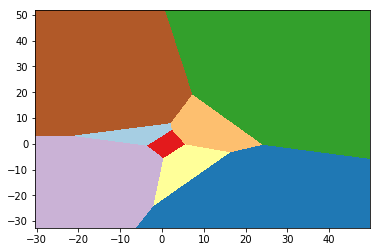

In [42]:
# Plotando as áreas dos clusters
plt.figure(1)
plt.clf()
plt.imshow(Z, 
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()), 
           cmap = plt.cm.Paired, 
           aspect = 'auto', 
           origin = 'lower')

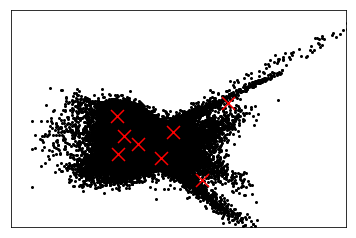

In [43]:
# Plotando os centróides de cada cluster
plt.plot(hpc[:, 0], hpc[:, 1], 'k.', markersize = 4)
centroids = k_means.cluster_centers_
inert = k_means.inertia_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 169, linewidths = 3, color = 'r', zorder = 8)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

No gráfico acima já conseguimos identificar de um modo geral o resultado da clusterização e centróides, porém ainda vamos trabalhar com apenas um dos sensores para ter uma clusterização mais direcionada.

### Atividade A9: Pernas LD e Sensor Acelerômetro

In [54]:
# Obtendo somente os dados do sensor de acelerômetro
df_pernas_A = df_pernas.iloc[:,:2]

In [55]:
# Tranformando os dados em array para serem trabalhados
array_pernas_A = df_pernas_A.values

In [56]:
# Aplicando redução de dimensionalidade
hpc = PCA(n_components = 2).fit_transform(array_pernas_A)

In [57]:
# Criando um novo modelo
k_means = KMeans()
k_means.fit(hpc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [58]:
# Obtendo os valores mínimos e máximos e organizando o shape
x_min, x_max = hpc[:, 0].min() - 5, hpc[:, 0].max() - 1
y_min, y_max = hpc[:, 1].min() + 1, hpc[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = k_means.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

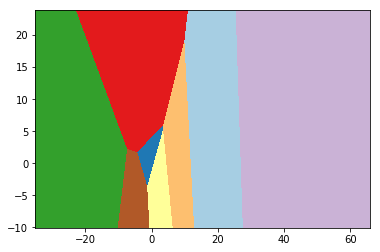

In [59]:
# Plotando as áreas dos clusters
plt.figure(1)
plt.clf()
plt.imshow(Z, 
           interpolation = 'nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Paired,
           aspect = 'auto', 
           origin = 'lower')

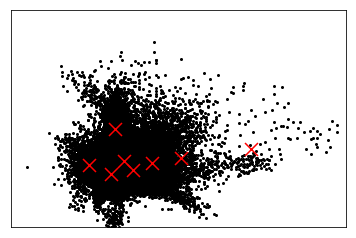

In [60]:
# Plotando os centróides
plt.plot(hpc[:, 0], hpc[:, 1], 'k.', markersize = 4)
centroids = k_means.cluster_centers_
inert = k_means.inertia_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 169, linewidths = 3, color = 'r', zorder = 8)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Esse é o resultado da clusterização olhando somente para o sensor acelerômetro. Neste gráfico podemos identificar os centróides e agora criaremos um gráfico para enxergar melhor a separação.

Como o processo de análise do gráfico está muito pesado por conta da quantidade de informações, vamos aplicar uma segmentação aleatória para diminuir a base.

In [61]:
import pylab as pl

In [67]:
# Segmentação aleatória da base consirando 30%
df_treino, df_teste = train_test_split(array_pernas_A, train_size = .1)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [68]:
# Aplica redução de dimensionalidade
hpc = PCA(n_components = 2).fit_transform(df_treino)

In [69]:
# Construção do modelo - precisamos de 8 cluster e como padrão o Kmeans usa 8
k_means = KMeans(n_clusters = 8)
k_means.fit(hpc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

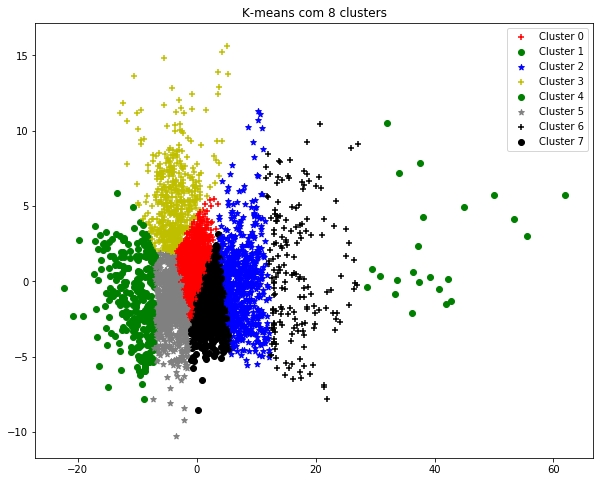

In [70]:
# Gerando "labels" para os resultados dos clusters
for i in range(0, hpc.shape[0]):
    if k_means.labels_[i] == 1:
        c1 = pl.scatter(hpc[i,0],hpc[i,1],c='r', marker='+')
    elif k_means.labels_[i] == 0:
        c2 = pl.scatter(hpc[i,0],hpc[i,1],c='g', marker='o')
    elif k_means.labels_[i] == 2:
        c3 = pl.scatter(hpc[i,0],hpc[i,1],c='b', marker='*')
    elif k_means.labels_[i] == 3:
        c4 = pl.scatter(hpc[i,0],hpc[i,1],c='y', marker='+')
    elif k_means.labels_[i] == 4:
        c5 = pl.scatter(hpc[i,0],hpc[i,1],c='g', marker='o')
    elif k_means.labels_[i] == 5:
        c6 = pl.scatter(hpc[i,0],hpc[i,1],c='gray', marker='*')
    elif k_means.labels_[i] == 6:
        c7 = pl.scatter(hpc[i,0],hpc[i,1],c='black', marker='+')
    elif k_means.labels_[i] == 7:
        c8 = pl.scatter(hpc[i,0],hpc[i,1],c='black', marker='o')
        
pl.legend([c1, c2, c3, c4, c5, c6, c7, c8],['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'
                                                   , 'Cluster 5', 'Cluster 6', 'Cluster 7'])
pl.title('K-means com 8 clusters')      
pl.rcParams["figure.figsize"] = (10,8)        
pl.show()

# Segunda Atividade A15

A segunda atividade é considerada mais agitada "Cycling on an exercise bike in horizontal and vertical positions (A15)". Também vamos trabalhar somente com os dados das atividades PERNAS e o sensor acelerômetro.

Seguiremos o mesmo processo da atividade anterior.

In [71]:
# Recebendo os dados e importando em um dataframe
atividade = "a15"
df_total = load_data(atividade)

In [72]:
# Obtendo somente os dados de pernas
df_pernas = df_total.iloc[:,27:45]

In [73]:
# Obtendo somente os dados do sensor de acelerômetro
df_pernas_A = df_pernas.iloc[:,:2]

In [74]:
# Tranformando os dados em array para serem trabalhados
array_pernas_A = df_pernas_A.values

In [75]:
# Aplicando redução de dimensionalidade
hpc = PCA(n_components = 2).fit_transform(array_pernas_A)

In [76]:
# Criando um novo modelo
k_means = KMeans()
k_means.fit(hpc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [77]:
# Obtendo os valores mínimos e máximos e organizando o shape
x_min, x_max = hpc[:, 0].min() - 5, hpc[:, 0].max() - 1
y_min, y_max = hpc[:, 1].min() + 1, hpc[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .01))
Z = k_means.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

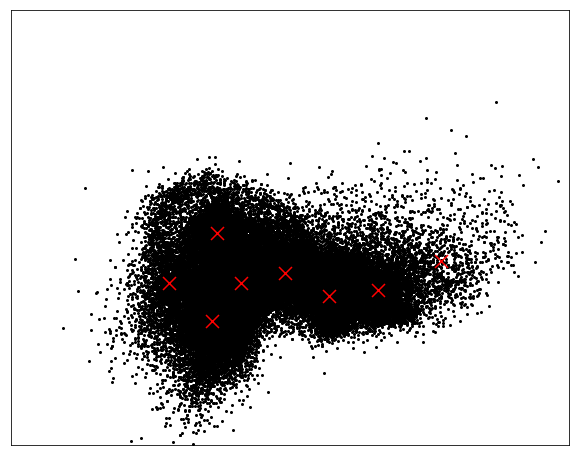

In [78]:
# Plotando os centróides
plt.plot(hpc[:, 0], hpc[:, 1], 'k.', markersize = 4)
centroids = k_means.cluster_centers_
inert = k_means.inertia_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 169, linewidths = 3, color = 'r', zorder = 8)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [81]:
# Segmentação aleatória da base consirando 20%
df_treino, df_teste = train_test_split(array_pernas_A, train_size = .1)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [82]:
# Aplica redução de dimensionalidade
hpc = PCA(n_components = 2).fit_transform(df_treino)

In [83]:
# Construção do modelo - precisamos de 8 cluster e como padrão o Kmeans usa 8
k_means = KMeans(n_clusters = 8)
k_means.fit(hpc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

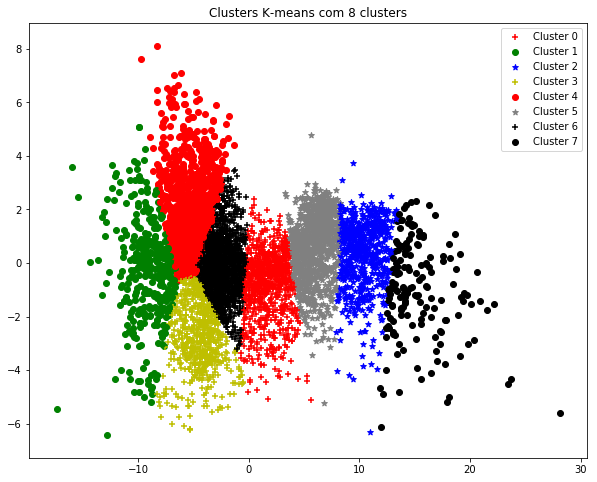

In [84]:
# Gerando "labels" para os resultados dos clusters
for i in range(0, hpc.shape[0]):
    if k_means.labels_[i] == 1:
        c1 = pl.scatter(hpc[i,0],hpc[i,1],c='r', marker='+')
    elif k_means.labels_[i] == 0:
        c2 = pl.scatter(hpc[i,0],hpc[i,1],c='g', marker='o')
    elif k_means.labels_[i] == 2:
        c3 = pl.scatter(hpc[i,0],hpc[i,1],c='b', marker='*')
    elif k_means.labels_[i] == 3:
        c4 = pl.scatter(hpc[i,0],hpc[i,1],c='y', marker='+')
    elif k_means.labels_[i] == 4:
        c5 = pl.scatter(hpc[i,0],hpc[i,1],c='r', marker='o')
    elif k_means.labels_[i] == 5:
        c6 = pl.scatter(hpc[i,0],hpc[i,1],c='gray', marker='*')
    elif k_means.labels_[i] == 6:
        c7 = pl.scatter(hpc[i,0],hpc[i,1],c='black', marker='+')
    elif k_means.labels_[i] == 7:
        c8 = pl.scatter(hpc[i,0],hpc[i,1],c='black', marker='o')
        
pl.legend([c1, c2, c3, c4, c5, c6, c7, c8],['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'
                                                   , 'Cluster 5', 'Cluster 6', 'Cluster 7'])
pl.title('Clusters K-means com 8 clusters')      
pl.rcParams["figure.figsize"] = (10,8)        
pl.show()

Este é o modelo de clusterização da segunda atividade. 

# Silhouette Score

Para analisar se nosso modelo de clusterização está performando bem, podemos usar o Silhouette Score. O que esse indicador nos mostra é um coeficiente de -1 até 1 onde 1 é considerado um bom modelo, 0 considerado overlapping e -1 considerando um cluster incorreto.

In [85]:
df_treino, df_teste = train_test_split(array_pernas_A, train_size = .1)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [86]:
# Aplicando redução de dimensionalidade
hpc = PCA(n_components = 2).fit_transform(df_treino)

In [87]:
# Construindo do modelo
k_means = KMeans(n_clusters = 8)
k_means.fit(hpc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [88]:
# Aplicando o Silhouette Score
labels = k_means.labels_
silhouette_score(hpc, labels, metric = 'euclidean')

0.373067777227584

Olhando para o coeficiente podemos identificar que nosso modelo de clusterização ainda pode melhorar, assim podemos mudar alguns parametros e variáveis até chegar no modelo ideal ao que desejamos.

# Conclusão

### Escolha do modelo:

Trabalhamos com o modelo Kmeans++ considerando ser um modelo já consolidado e mais amplamente utilizado, porém temos alguns modelos com melhorias que podem ser testados como DBSCAN e Mean Shift. Esses algoritmos mais modernos podem, além de outros benefícios, auxiliar na identificação da quantidade de clusters.

### Variáveis:

As variáveis usadas foram definidas de acordo com a solicotação do desafio, considerando uma atividade mais leve e uma mais intensa. Também foram selecionadas apenas as atividades de pernas do lado direito e o sensor acelerômetro. 

### Resultado:

Nos modelos de clusterização não há uma classificação na saída e cabe a nós definir o significado de cada cluster. Com o resultado obtido podemos identificar para uma próxima entrada o qual ela pertence aplicando para cada modelo de negócio uma ação específica.


Obs: Outra possibilidade é fazer uma clusterização para tentar identificar homens e mulheres.
